Projeto Final
Tema: E-Commerce

1. Objetivo geral do projeto:
Verificar perfis de usuários com base no consumo da loja Everything Plus, uma loja online que vende utensílios domésticos

2. Entendimento do problema e entregas esperadas:
Problema: Prever comportamentos de clientes atraves dos seus perfis de consumo , utilizando análise exploratória de dados, segmentação por histórico de compras e testes de hipótese e desenvolver com a equipe de marketing o desenvolvimento de promoções

3. Coleta e Preparação dos Dados:

Informação sobre os Dados:
`InvoiceNo` — identificador de pedido
`StockCode` — identificador de item
`Description` — nome de item
`Quantity`
`InvoiceDate` — data do pedido
`UnitPrice` — preço por item
`CustomerID`
Link no Google Drive (arquivo zip) https://drive.google.com/file/d/1zSszrBIcJSXdTkxCBCQsMpXH1XD_IkvZ/view?usp=sharing

3.1 Importar os dados
Carregar todos o arquivo e verificar dados básicos e gerais para poder realizar o tratamento dos dados (.info, .head etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [4]:
df.info(memory_usage='deep') # observando tipo de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193612 entries, 0 to 193611
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    193612 non-null  object 
 1   StockCode    193612 non-null  object 
 2   Description  192842 non-null  object 
 3   Quantity     193612 non-null  int64  
 4   InvoiceDate  193612 non-null  object 
 5   UnitPrice    193612 non-null  float64
 6   CustomerID   136714 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 56.4 MB


3.2 Tratar os dados - Limpeza e Pré-processamento

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')

In [6]:
# Percorrendo os cabeçalhos e convertendo tudo em minúsculas
df.columns = df.columns.str.lower()

In [7]:
df.columns # verificando se converteu

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid'],
      dtype='object')

In [8]:
#Verificar valores ausentes e substituir valores ausentes (se necessário)
df.isnull().sum()

invoiceno          0
stockcode          0
description      770
quantity           0
invoicedate        0
unitprice          0
customerid     56898
dtype: int64

In [9]:
df['description'].describe()

count                                 192842
unique                                  3439
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    1103
Name: description, dtype: object

In [10]:
df['description'].nunique()

3439

In [11]:
df['description'].fillna('unknown', inplace=True) # retirando os nomes em branco e substituindo por desconhecido

In [12]:
df['description'].isnull().sum() # verificando se removeu

0

In [13]:
df['description'].duplicated().sum()

190172

In [14]:
df['description'].drop_duplicates().reset_index(drop=True).to_frame(name='item')

,item
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
3435,sold as set/6 by dotcom
3436,wet/rusty
3437,damages/dotcom?
3438,on cargo order


In [15]:
df['customerid'].describe()

count    136714.000000
mean      15276.645003
std        1725.364949
min       12346.000000
25%       13838.000000
50%       15150.000000
75%       16807.000000
max       18283.000000
Name: customerid, dtype: float64

In [16]:
df['customerid'].isnull().sum()

56898

In [17]:
df['customerid'].nunique() # 4372 clientes unicos

2651

In [18]:
df['customerid'].fillna('unknownID', inplace=True) # retirando os nomes em branco e substituindo por desconhecido

In [19]:
df['customerid'].isnull().sum() #verificando de converteu

0

In [20]:
df['customerid'].duplicated().sum() #Verificar valores duplicados e remover duplicados (se necessário)

190960

In [21]:
df['customerid'].drop_duplicates()

0         17850.0
9         13047.0
26        12583.0
46        13748.0
65        15100.0
           ...   
192366    13976.0
192524    16139.0
192916    15730.0
193368    16266.0
193391    15123.0
Name: customerid, Length: 2652, dtype: object

In [22]:
#Converter tipos para otimizar espaço do arquivo e facilitar análise (se necessário)
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193612 entries, 0 to 193611
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    193612 non-null  object        
 1   stockcode    193612 non-null  object        
 2   description  193612 non-null  object        
 3   quantity     193612 non-null  int64         
 4   invoicedate  193612 non-null  datetime64[ns]
 5   unitprice    193612 non-null  float64       
 6   customerid   193612 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 10.3+ MB


In [24]:
#Converter variáveis categóricas e normalizar valores numéricos
df['invoiceno'] = pd.to_numeric(df['invoiceno'], errors='coerce').astype('Int64')
df['stockcode'] = pd.to_numeric(df['stockcode'], errors='coerce').astype('Int64')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce').astype('Int64')

In [25]:
df.info(memory_usage='deep') # observando tipo de dados, converteu tudo para inteiro o orquivo ficou mais leve com metade do tamanho inicial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193612 entries, 0 to 193611
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    190129 non-null  Int64         
 1   stockcode    169657 non-null  Int64         
 2   description  193612 non-null  object        
 3   quantity     193612 non-null  Int64         
 4   invoicedate  193612 non-null  datetime64[ns]
 5   unitprice    193612 non-null  float64       
 6   customerid   193612 non-null  object        
dtypes: Int64(3), datetime64[ns](1), float64(1), object(2)
memory usage: 31.1 MB


In [26]:
#Verificar consistência e unicidade de customerID
df['customerid'].describe() # nao posso passar para inteiro pois existe uma grande quantidade de usuarios desconhecidos que nao podemos ignorar na analise

count        193612
unique         2652
top       unknownID
freq          56898
Name: customerid, dtype: object

In [27]:
#Verificar integridade dos dados antes de seguir (conferindo numero de linhas etc)
df.sample(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
24656,538349,22649,STRAWBERRY FAIRY CAKE TEAPOT,1,2018-12-08 14:59:00,11.02,unknownID
109496,545649,<NA>,SET OF 4 POLKADOT PLACEMATS,1,2019-03-02 13:14:00,3.75,14995.0
73512,542354,20711,JUMBO BAG TOYS,10,2019-01-25 12:19:00,1.95,14709.0
170817,551342,21912,VINTAGE SNAKES & LADDERS,8,2019-04-26 08:34:00,3.75,16099.0
178196,552229,21090,SET/6 COLLAGE PAPER PLATES,86,2019-05-04 15:40:00,0.39,unknownID
133548,547788,22487,WHITE WOOD GARDEN PLANT LADDER,1,2019-03-23 12:00:00,19.96,unknownID
116522,546252,48184,DOORMAT ENGLISH ROSE,2,2019-03-08 14:42:00,7.95,14930.0
87897,543736,20711,JUMBO BAG TOYS,10,2019-02-09 12:36:00,1.95,15044.0
162733,550515,22077,6 RIBBONS RUSTIC CHARM,3,2019-04-16 17:29:00,1.65,14502.0
47772,540418,21918,SET 12 KIDS COLOUR CHALK STICKS,1,2019-01-05 11:04:00,0.85,unknownID


In [28]:
df['invoiceno'].sample(3)

8974      537159
104379    545166
22943     538177
Name: invoiceno, dtype: Int64

In [29]:
df['stockcode'].sample(3)

82895    22948
73264    22173
26684     <NA>
Name: stockcode, dtype: Int64

4. Analise Exploratoria dos Dados

4. Análise Exploratória dos Dados:
4.1 Analisar os dados(distribuições, correlações e outliers) explorando correlações entre variáveis

In [30]:
#investigar o porque de valores negativos, provavelmente ligados a devolucoes de estoque.

In [31]:
# Criar coluna de valor total da compra 
df['totalprice'] = df['quantity'] * df['unitprice']

In [32]:
df['totalprice'].describe()

count    193612.000000
mean         17.484588
std         275.343631
min      -77183.600000
25%           3.750000
50%           9.840000
75%          17.400000
max       77183.600000
Name: totalprice, dtype: float64

In [33]:
# esse numero minimo negativo deve indicar o numero de devolucoes, devemos excluir quando analisar os dados

In [34]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,totalprice
0,536365,<NA>,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.3
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34
2,536365,<NA>,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.0
3,536365,<NA>,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34
4,536365,<NA>,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...,...,...
193607,553540,23191,BUNDLE OF 3 RETRO NOTE BOOKS,48,2019-05-15 15:32:00,1.45,17511.0,69.6
193608,553540,22607,WOODEN ROUNDERS GARDEN SET,8,2019-05-15 15:32:00,8.50,17511.0,68.0
193609,553540,21888,BINGO SET,4,2019-05-15 15:32:00,3.75,17511.0,15.0
193610,553540,22197,SMALL POPCORN HOLDER,100,2019-05-15 15:32:00,0.72,17511.0,72.0


In [35]:
df[df['quantity'] < 0].sample(5)
#investigar o porque de valores negativos, provavelmente ligados a devolucoes de estoque

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,totalprice
166524,<NA>,<NA>,Manual,-1,2019-04-19 15:15:00,194.97,unknownID,-194.97
74430,<NA>,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2019-01-26 09:32:00,1.25,14146.0,-15.0
9493,<NA>,37449,CERAMIC CAKE STAND + HANGING CAKES,-1,2018-12-03 14:44:00,9.95,14606.0,-9.95
122731,<NA>,21389,IVORY HANGING DECORATION BIRD,-1,2019-03-15 18:14:00,0.85,14329.0,-0.85
140735,<NA>,21908,CHOCOLATE THIS WAY METAL SIGN,-12,2019-03-29 11:58:00,2.10,16801.0,-25.2


In [36]:
#preciso remover esses valores pois pretendo analisar as compras que sao valores positivos, então removo todos os valores negativos que provavelmente são as devoluções
df_vendas = df[(df['quantity'] > 0) & (df['unitprice'] > 0)].copy()

In [37]:
df_vendas #data frame sem valores negativos

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,totalprice
0,536365,<NA>,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.3
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34
2,536365,<NA>,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.0
3,536365,<NA>,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34
4,536365,<NA>,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...,...,...
193607,553540,23191,BUNDLE OF 3 RETRO NOTE BOOKS,48,2019-05-15 15:32:00,1.45,17511.0,69.6
193608,553540,22607,WOODEN ROUNDERS GARDEN SET,8,2019-05-15 15:32:00,8.50,17511.0,68.0
193609,553540,21888,BINGO SET,4,2019-05-15 15:32:00,3.75,17511.0,15.0
193610,553540,22197,SMALL POPCORN HOLDER,100,2019-05-15 15:32:00,0.72,17511.0,72.0


In [38]:
top10 = df_vendas.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10) #top produtos vendidos em quantidades vendidas - unidades

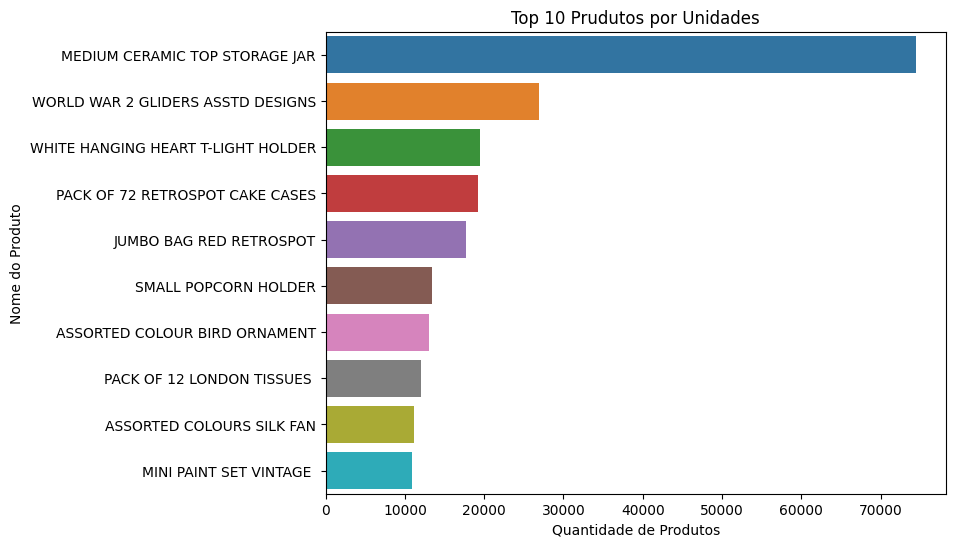

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x=top10.values, y=top10.index)
plt.title('Top 10 Prudutos por Unidades')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Nome do Produto')
plt.show() # Criando gráfico

In [40]:
topproducts = df_vendas['description'].value_counts().head(10) #top produtos gerais, os que mais aparecem

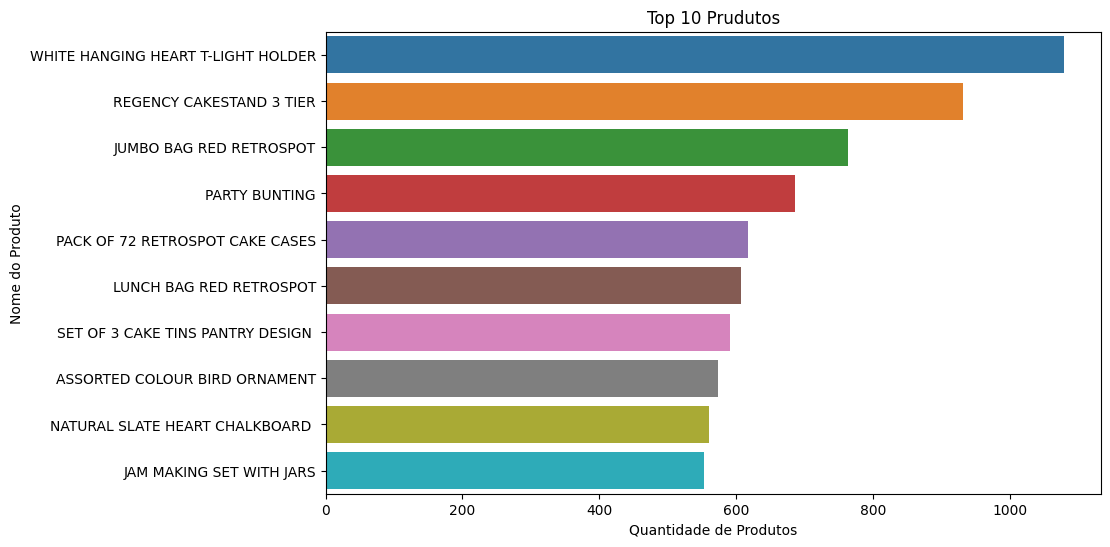

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x=topproducts.values, y=topproducts.index)
plt.title('Top 10 Prudutos')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Nome do Produto')
plt.show()

In [42]:
top10unit = df_vendas.groupby('description')['unitprice'].sum().sort_values(ascending=False).head(10)  #top10 produtos vendidos por preço unitãrio

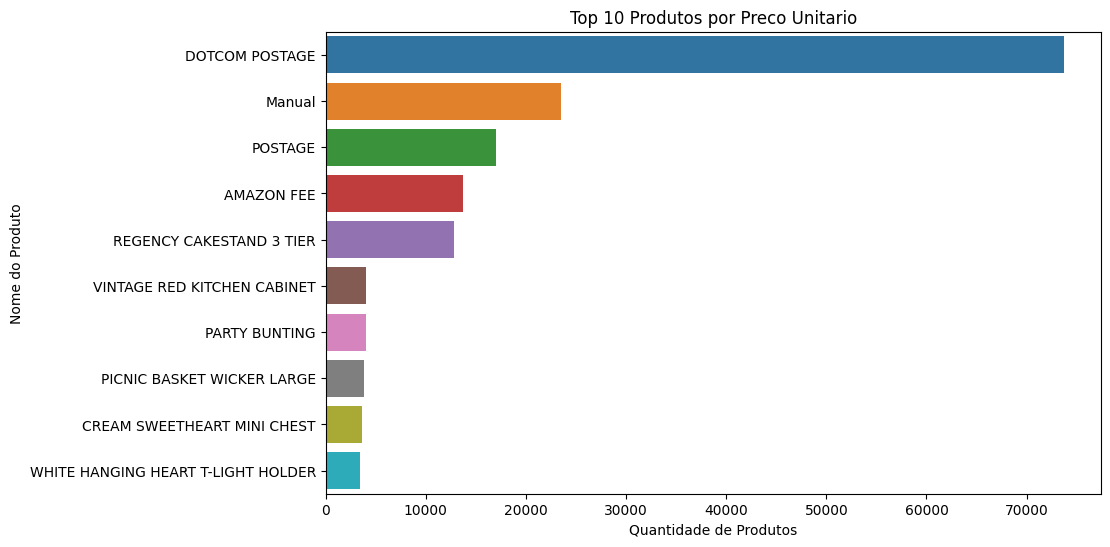

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10unit.values, y=top10unit.index)
plt.title('Top 10 Produtos por Preco Unitario')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Nome do Produto')
plt.show()

In [44]:
top10total = df_vendas.groupby('description')['totalprice'].sum().sort_values(ascending=False).head(10)  #top10 produtos vendidos em preco total do pedido

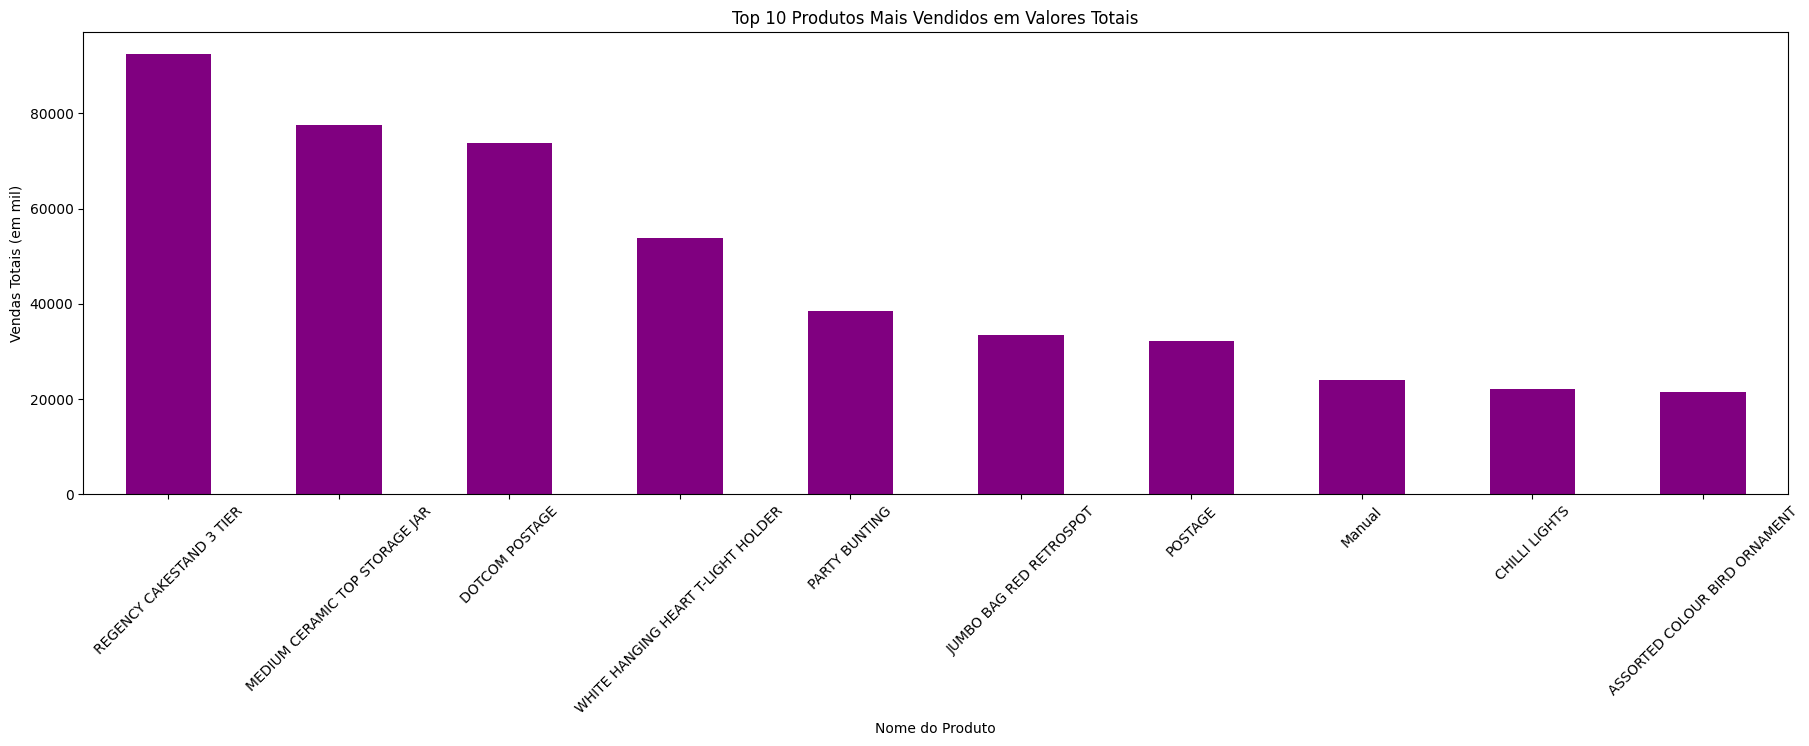

In [45]:
top10total.plot(kind='bar', figsize=(22, 6), color='purple', title='Top 10 Produtos Mais Vendidos em Valores Totais')
# Ajustar rótulos
plt.xlabel('Nome do Produto')
plt.ylabel('Vendas Totais (em mil)')
plt.xticks(rotation=45)  # Inclina os nomes pra melhor leitura
plt.show()

In [46]:
top10clients = df_vendas.groupby('customerid')['totalprice'].sum().sort_values(ascending=False).head(10) #top 10 clientes por venda total, no caso soma de venda de usuarios desconhecidos nao pode ser ignorada, focar em identificar para poder segmentar melhor
print (top10clients)

customerid
unknownID    697215.79
14646.0       99607.84
12346.0        77183.6
18102.0       64642.11
15749.0        44534.3
14156.0       43907.23
12415.0       38192.74
17450.0       37734.58
16029.0       35512.26
17511.0       34743.54
Name: totalprice, dtype: Float64


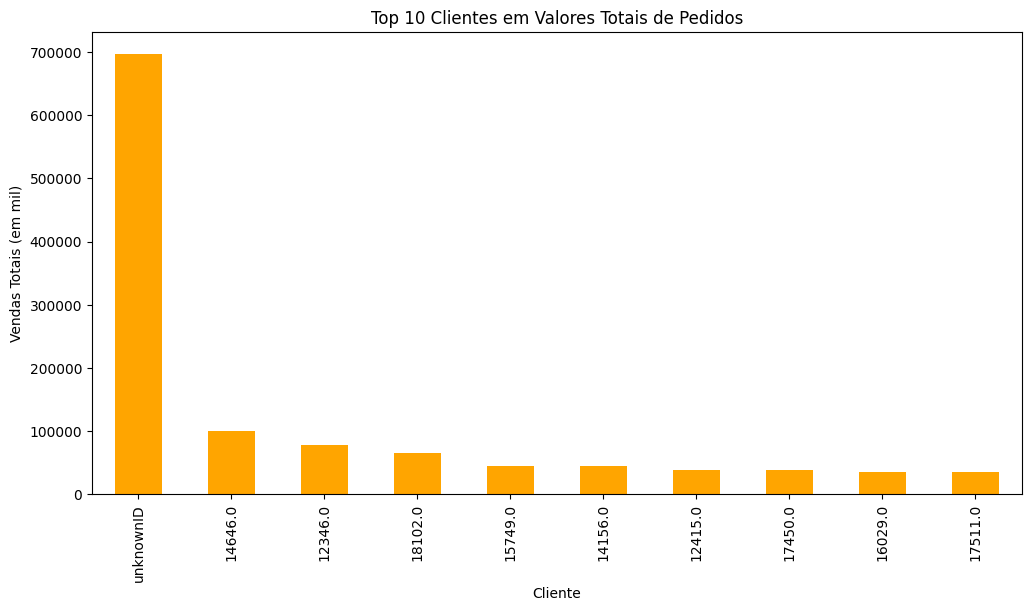

In [47]:
top10clients.plot(kind='bar', figsize=(12, 6), color='orange', title='Top 10 Clientes em Valores Totais de Pedidos')
# Ajustar rótulos
plt.xlabel('Cliente')
plt.ylabel('Vendas Totais (em mil)')
plt.xticks(rotation=90)  # Inclina os nomes pra melhor leitura
plt.show()

In [48]:
df_vendas.groupby('customerid')['totalprice'].describe()

,count,mean,std,min,25%,50%,75%,max
customerid,,,,,,,,
12346.0,1,77183.6,<NA>,77183.6,77183.6,77183.6,77183.6,77183.6
12347.0,84.0,21.7075,27.107318,5.04,14.9625,17.0,19.95,249.6
12348.0,28.0,53.115714,46.071918,13.2,34.92,41.76,50.4,240.0
12350.0,17.0,19.670588,7.275538,8.5,15.0,19.8,25.2,40.0
12352.0,38.0,41.100263,74.732184,10.2,17.4,17.85,22.5,376.5
...,...,...,...,...,...,...,...,...
18272.0,55.0,17.828,7.246203,10.08,15.0,15.3,18.72,50.4
18273.0,1,51.0,<NA>,51.0,51.0,51.0,51.0,51.0
18280.0,10.0,18.06,3.380319,14.85,15.075,17.7,19.3875,23.7


In [49]:
dfct = df_vendas.groupby('customerid')['totalprice'].mean().reset_index()
print (dfct)

     customerid  totalprice
0       12346.0     77183.6
1       12347.0     21.7075
2       12348.0   53.115714
3       12350.0   19.670588
4       12352.0   41.100263
...         ...         ...
2597    18272.0      17.828
2598    18273.0        51.0
2599    18280.0       18.06
2600    18283.0    2.316915
2601  unknownID   12.560862

[2602 rows x 2 columns]


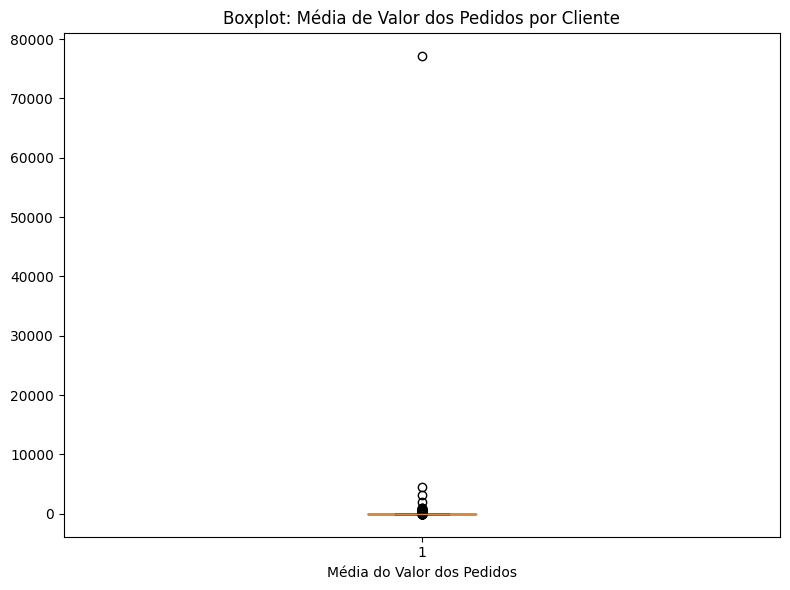

In [50]:
plt.figure(figsize=(8, 6))
plt.boxplot(dfct['totalprice'], vert=True)
plt.title('Boxplot: Média de Valor dos Pedidos por Cliente')
plt.xlabel('Média do Valor dos Pedidos')
plt.tight_layout()
plt.show()

In [51]:
tops = df_vendas.groupby('customerid')['description'].value_counts().nlargest(5) #top
print (tops)

customerid  description                      
unknownID   DOTCOM POSTAGE                       326
            JUMBO BAG RED RETROSPOT              229
            JUMBO SHOPPER VINTAGE RED PAISLEY    166
            JUMBO STORAGE BAG SUKI               165
            SMALL POPCORN HOLDER                 162
Name: description, dtype: int64


In [52]:
pedidospordia = df_vendas.groupby(df['invoicedate'].dt.date)['invoiceno'].nunique()
print (pedidospordia)

invoicedate
2018-11-29    127
2018-11-30    142
2018-12-01     68
2018-12-03     88
2018-12-04    102
             ... 
2019-05-10     86
2019-05-11     73
2019-05-13     31
2019-05-14     68
2019-05-15     68
Name: invoiceno, Length: 130, dtype: int64


Text(0, 0.5, 'Pedidos únicos')

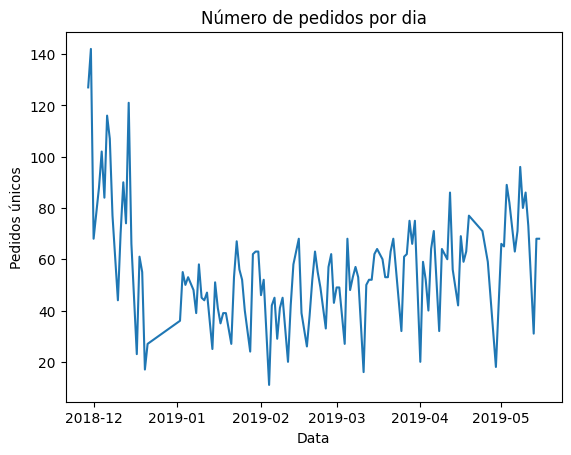

In [53]:
pedidospordia.plot(title='Número de pedidos por dia')
plt.xlabel("Data")
plt.ylabel("Pedidos únicos") #pedidos por dia

In [54]:
df_vendas['invoicedate'].describe() # dados entre 29 de out 2018 e 7 de dez 2019  - aproximadamente 1 ano e 3 meses de análises, top de vendas foi em 29 de out de 2019

count                  188911
unique                   6932
top       2018-12-04 16:57:00
freq                      675
first     2018-11-29 08:26:00
last      2019-05-15 15:32:00
Name: invoicedate, dtype: object

Text(0, 0.5, 'Clientes')

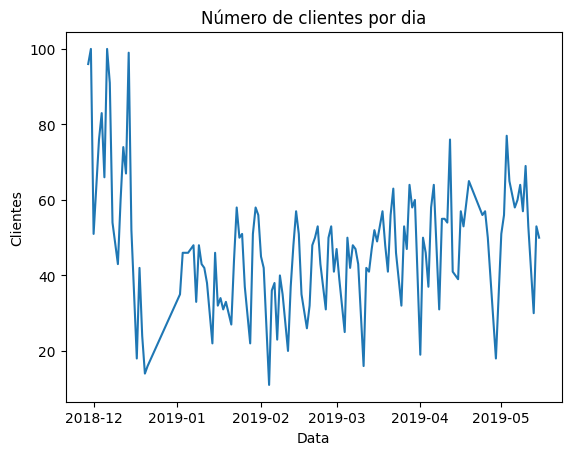

In [55]:
clientespordia = df_vendas.groupby(df['invoicedate'].dt.date)['customerid'].nunique()
clientespordia.plot(title='Número de clientes por dia') 
plt.xlabel("Data")
plt.ylabel("Clientes") # clientes por dia

Text(0, 0.5, 'Valor de Vendas')

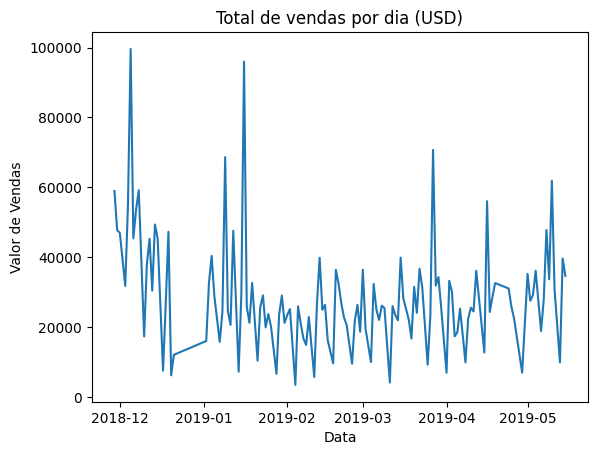

In [56]:
vendaspordia = df_vendas.groupby(df['invoicedate'].dt.date)['totalprice'].sum()
vendaspordia.plot(title='Total de vendas por dia (USD)')
plt.xlabel("Data")
plt.ylabel("Valor de Vendas") #total de vendas por dia

In [57]:
vendaspordia.describe()

count      130.000000
mean     28726.228700
std      15875.747983
min       3457.110000
25%      20602.965000
50%      25948.725000
75%      33578.997500
max      99618.200000
Name: totalprice, dtype: float64

In [58]:
df_vendas['date'] = df_vendas['invoicedate'].dt.date
df_vendas['hour'] = df_vendas['invoicedate'].dt.hour

In [59]:
df_vendas['date'].describe() # maior dia de vendas 03/12/2019

count         188911
unique           130
top       2018-12-04
freq            3816
Name: date, dtype: object

In [60]:
df_vendas['hour'].describe() # entre as 6 e as 20 hrs, sendo que maior parte dos pedidos fica entre as 13 e 15 hrs.

count    188911.000000
mean         13.003277
std           2.471378
min           7.000000
25%          11.000000
50%          13.000000
75%          15.000000
max          20.000000
Name: hour, dtype: float64

Grafico de Dispersao
Produtos e Valor total

In [61]:
df_vp = df_vendas.groupby('description')['totalprice'].sum().reset_index()
print (df_vp)

                           description  totalprice
0        4 PURPLE FLOCK DINNER CANDLES       76.42
1           OVAL WALL MIRROR DIAMANTE      1375.69
2      SET 2 TEA TOWELS I LOVE LONDON      7393.02
3               SPACEBOY BABY GIFT SET      3440.1
4                *Boombox Ipod Classic       16.98
...                                ...         ...
3345   ZINC T-LIGHT HOLDER STARS SMALL     1016.74
3346    ZINC TOP  2 DOOR WOODEN SHELF       236.18
3347  ZINC WILLIE WINKIE  CANDLE STICK      691.65
3348       ZINC WIRE KITCHEN ORGANISER       62.39
3349  ZINC WIRE SWEETHEART LETTER TRAY       97.71

[3350 rows x 2 columns]


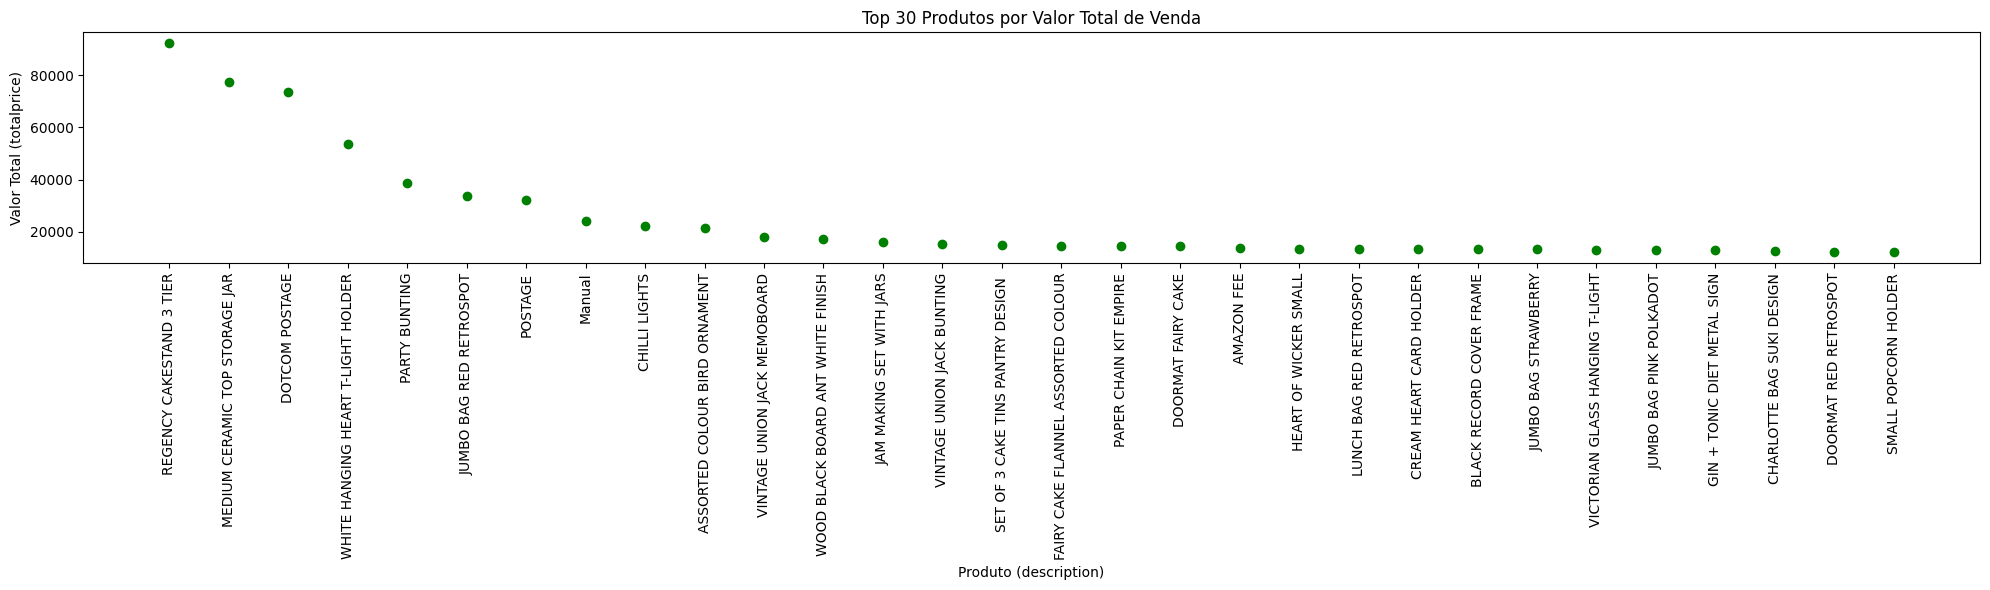

In [62]:
df_top20 = df_vp.nlargest(30, 'totalprice')
# Plotar gráfico de dispersão
plt.figure(figsize=(20, 6))
plt.scatter(df_top20['description'], df_top20['totalprice'], color='green')
plt.xticks(rotation=90)
plt.title('Top 30 Produtos por Valor Total de Venda')
plt.xlabel('Produto (description)')
plt.ylabel('Valor Total (totalprice)')
plt.tight_layout()
plt.show()

In [63]:
df_vendas['totalprice'].describe() # maioria dos pedidos fica entre 9.90 e 17.70 dolares.

count    188911.000000
mean         19.768090
std         192.950906
min           0.001000
25%           3.950000
50%           9.950000
75%          17.700000
max       77183.600000
Name: totalprice, dtype: float64

In [64]:
df_vendas['unitprice'].describe() # maioria dos precos unitarios fica entre 2 e 4 dolares.

count    188911.000000
mean          4.170105
std          40.764733
min           0.001000
25%           1.250000
50%           2.100000
75%           4.210000
max       13541.330000
Name: unitprice, dtype: float64

In [65]:
heatmap_data = df_vendas.groupby(['date', 'hour'])['totalprice'].sum().unstack()

In [66]:
# Converte todos os valores para float
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

In [67]:
df_vendas['week'] = pd.to_datetime(df_vendas['invoicedate']).dt.to_period('W').apply(lambda r: r.start_time)
df_vendas['hour'] = pd.to_datetime(df_vendas['invoicedate']).dt.hour
df_vendas['week'] = df_vendas['week'].dt.strftime('%d/%m/%Y')
heatmap_data = df_vendas.groupby(['week', 'hour'])['totalprice'].sum().unstack()
heatmap_data = heatmap_data.fillna(0).astype(float)

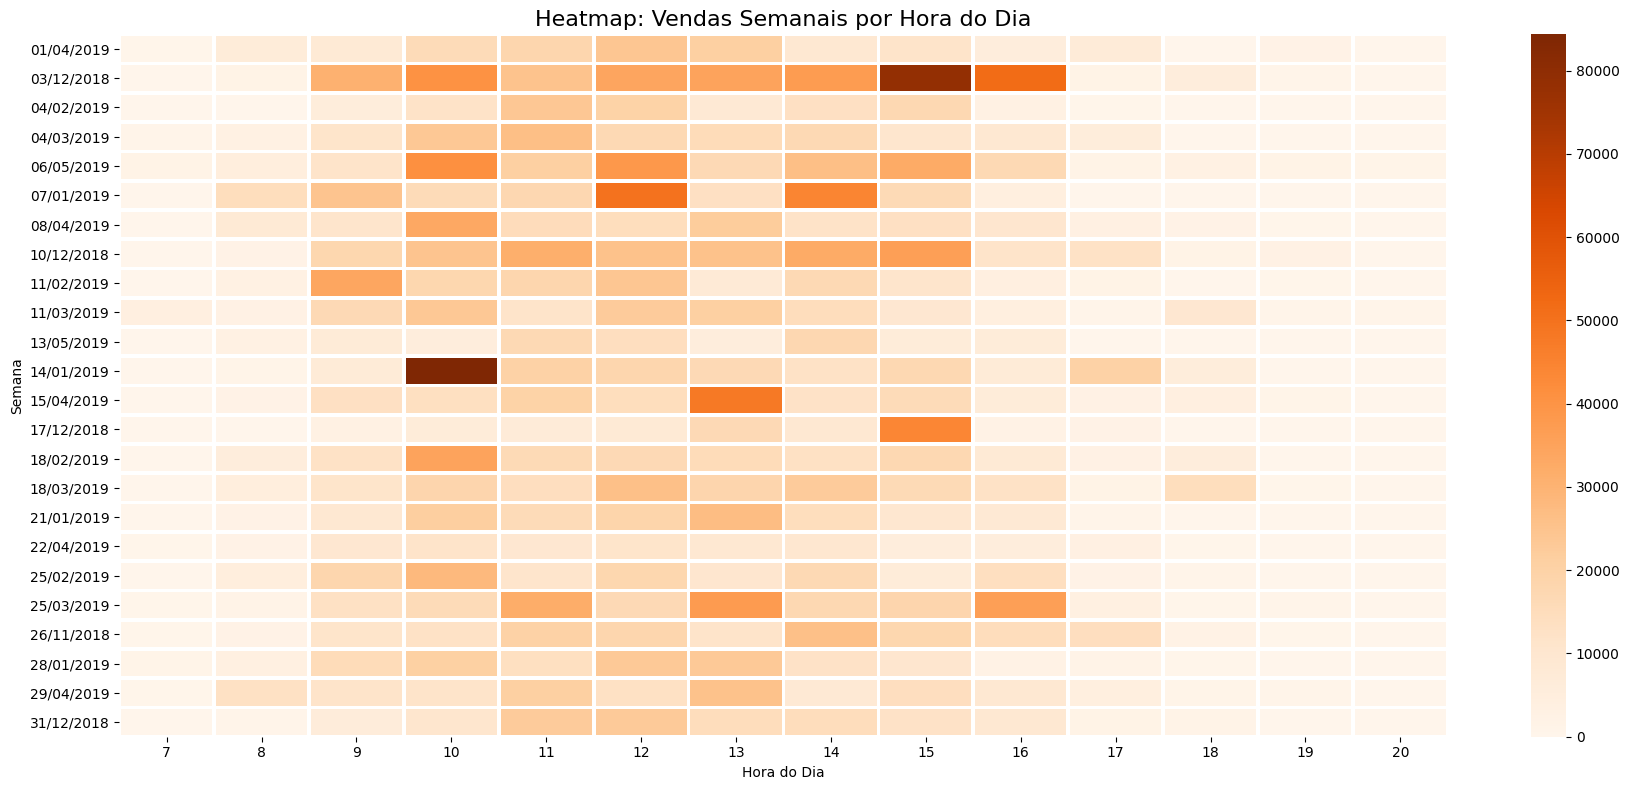

In [68]:
plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_data, cmap='Oranges', linewidths=2, linecolor='white')
plt.title("Heatmap: Vendas Semanais por Hora do Dia", fontsize=16)
plt.xlabel("Hora do Dia")
plt.ylabel("Semana")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Segmentação com K-means (Machine Learning)

In [69]:
# Pré-processamento
X = dfct[['totalprice']].copy()

# Aplica K-means para 3 segmentos (Baixo, médio, alto)
kmeans = KMeans(n_clusters=3, random_state=42)
dfct['segmento_kmeans'] = kmeans.fit_predict(X)

# Opcional: ordenar os clusters do menor para o maior valor médio
dfct['segmento_kmeans'] = dfct['segmento_kmeans'].map(
    dict(sorted(zip(
        np.argsort(kmeans.cluster_centers_.flatten()), 
        ['Baixo', 'Médio', 'Alto'] ))))

In [70]:
# Ver exemplo do resultado aleatorio de amostras
print(dfct[['customerid', 'totalprice', 'segmento_kmeans']].sample(10))

     customerid  totalprice segmento_kmeans
1885    16639.0     23.5575           Baixo
2416    17860.0    4.358621           Baixo
950     14483.0   15.233333           Baixo
2246    17491.0   36.056364           Baixo
144     12669.0   32.465714           Baixo
691     13934.0   29.745161           Baixo
856     14286.0   14.539574           Baixo
2563    18196.0    5.779231           Baixo
653     13841.0        85.0           Baixo
1687    16159.0   24.871429           Baixo


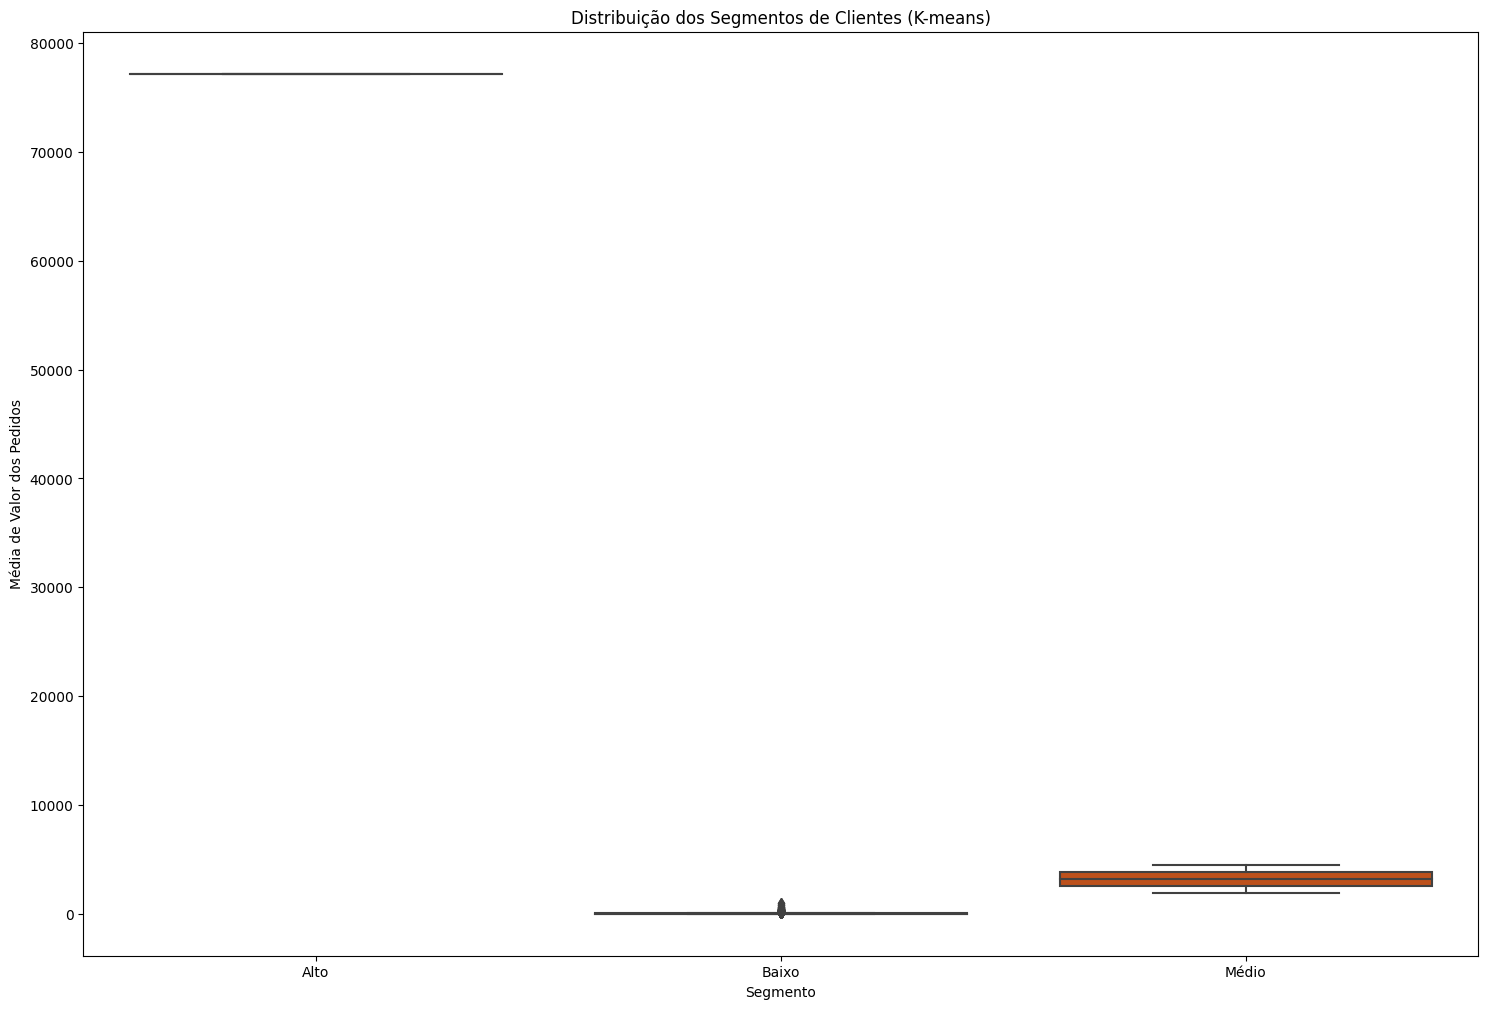

In [71]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=dfct, x='segmento_kmeans', y='totalprice', palette='Oranges')
plt.title('Distribuição dos Segmentos de Clientes (K-means)')
plt.xlabel('Segmento')
plt.ylabel('Média de Valor dos Pedidos')
plt.show()

In [72]:
dfct

,customerid,totalprice,segmento_kmeans
0,12346.0,77183.6,Alto
1,12347.0,21.7075,Baixo
2,12348.0,53.115714,Baixo
3,12350.0,19.670588,Baixo
4,12352.0,41.100263,Baixo
...,...,...,...
2597,18272.0,17.828,Baixo
2598,18273.0,51.0,Baixo
2599,18280.0,18.06,Baixo
2600,18283.0,2.316915,Baixo


4.4 Validação e testes
    Avaliar métricas (precision, recall, F1-score)

Floresta Aleatória - Classificação de Segmento:
              precision    recall  f1-score   support

       Baixo       1.00      1.00      1.00       520
       Médio       0.00      0.00      0.00         1

    accuracy                           1.00       521
   macro avg       0.50      0.50      0.50       521
weighted avg       1.00      1.00      1.00       521



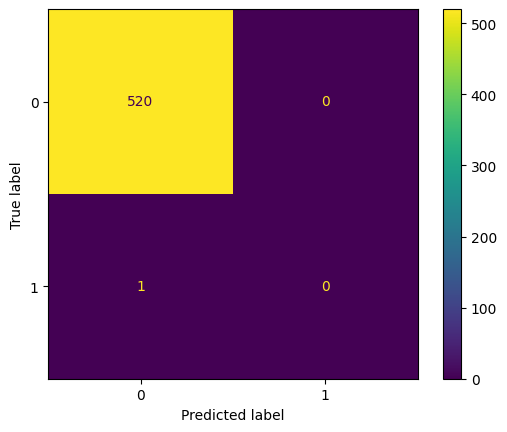

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Remover classes com menos de 2 amostras
class_counts = dfct['segmento_kmeans'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
dfct = dfct[dfct['segmento_kmeans'].isin(valid_classes)]

# Definir X e y
X = dfct.drop(columns=['totalprice', 'segmento_kmeans'])
y = dfct['segmento_kmeans']

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Treinando Modelo
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

#Avaliando o desempenho
y_pred_rf = rf_model.predict(X_valid)

print("Floresta Aleatória - Classificação de Segmento:")
print(classification_report(y_valid, y_pred_rf, zero_division=0))

# atriz de confusão
cm = confusion_matrix(y_valid, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Previsões e Conclusões:
Recomendações para a equipe de marketing com os achados

Produtos top 5 - Fazer ações específicas para esses produtos que são o carro chefe da loja, por exemplo na compra de 4 leve 1 gratuitamente. Tendência é aumentar a venda desses items.
Produtos que mais vendem - valor unitário entre 2 a 4 dólares, focar nesse tipo de produto que apesar de ter baixo agrega maior valor total, aumentando ticket médio.
A maioria dos pedidos fica entre 9.90 e 17.70 dolares, fazer promoções tentando aumentar esse valor médio de pedidos, por exemplo se pedido ultrapassar 20 dólares oferecer uma amostra ou brinde ou desconto na próxima compra.
Média de pedidos por dia - até 140 pedidos, tentar aumentar esses valores de pedidos com alertas por email e SMS para promoções no segundo pedido da semana ou dia com descontos.
Média de 120 clientes por dia - alguns repetem mais de 1 pedido ao dia, tentar aumentar esse número fazendo comprarem por repetição, oferecer frete grátis pro segundo ou terceiro pedido no mesmo dia, já que serão entregues no mesmo momento.
Dados da análise entre 29 de out 2018 e 7 de dez 2019  - aproximadamente 1 ano e 3 meses de análises, top de vendas foi em 29 de out de 2019 - tentar entender se houve algum evento para esse elevado número de vendas.
Tentar saber e forçar registro dos clientes unkown visto que suas compras são consideráveis e por isso não podemos descartá-los da análise, tentar de alguma forma identificar o cliente para poder estudar melhor o perfil desses clientes seja através de telefone ou email.
Hora dos pedidos - entre 9 e 17 hrs maior número de pedidos, instalar pop-ups que nesses horários tentem aumentar venda de items por impulso.
A maior parte dos clientes e os que realmente impactam a lucratividade são os que realizam pedidos mais baixos porém continuamente, valorizar fidelização, sistema de pontos e descontos etc.

In [75]:
# Exporta para CSV para fazer tableau 
df_vendas.to_csv('vendas.csv', index=False)

Dashbords  - links tableau publico
https://public.tableau.com/app/profile/debora.pivatto/viz/FinalProject1_17541317175330/Sheet1?publish=yes
https://public.tableau.com/app/profile/debora.pivatto/viz/FinalProject1_1_17541324490910/Sheet2?publish=yes

Fontes e Funções:
Pandas -  Manipulação de DataFrames, agregações
Seaborn -  Criação de gráficos estatísticos
Tableau Public - Criação de dashboards interativos
Matplotlib - Gráficos personalizados 
scikit-learn documentation - KMeans, StandardScaler, métricas 

Apresentacao - ppt
https://1drv.ms/p/c/0d14907ef08d7971/EThdrNeP_T5LkE7w6ocVtmEBKN3CiAujTrp7dy8C_YyOiw?e=clUXCO